In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, shapiro, pearsonr


In [2]:
# Set the style
sns.set_style("whitegrid")
#colors = ["#f1dede", "#d496a7", "#5d576b"] 
#colors = ["#FFB6C1", "#90EE90", "#87CEFA"] 
#colors = ["#003566", "#8d99ae", "#ef233c"] # 2b2d42 for the slope
colors = ["#dabfff", "#907ad6", "#4f518c"] # 2c2a4a for the slope
#colors = ["#002642", "#840032", "#e59500"] # e5dada for the slope

In [3]:
def plot_aggregated_stock_prices_with_sentiment_markers(dataframe):
    """
    Plot aggregated stock prices over time with markers indicating positive and negative articles.

    Parameters:
    - dataframe: Pandas DataFrame containing the dataset with columns ['Date', 'stock_price', 'Sentiment']

    Returns:
    - None (plots the graph)
    """
    # Convert the 'Date' column to datetime format
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])

    # Aggregate data by date
    aggregated_data = dataframe.groupby('Date').agg({'stock_price': 'mean', 'Sentiment': 'count'}).reset_index()

    # Identify positive and negative articles
    positive_articles = dataframe[dataframe['Sentiment'] == 'Positive']
    negative_articles = dataframe[dataframe['Sentiment'] == 'Negative']

    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot aggregated stock prices over time
    ax.plot(aggregated_data['Date'], aggregated_data['stock_price'], color='blue', label='Mean Stock Price')

    # Add markers for positive and negative articles
    ax.scatter(positive_articles['Date'], positive_articles['stock_price'], color='green', marker='+', s=100, label='Positive Article')
    ax.scatter(negative_articles['Date'], negative_articles['stock_price'], color='red', marker='_', s=100, label='Negative Article')

    # Add labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock Price')
    ax.set_title('Aggregated Stock Prices Over Time with Article Sentiment Markers')
    ax.legend()

    # Add grid
    ax.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()


In [4]:
def violinPlot(x,y,data):
    
    sns.violinplot(x=x, y=y, data=data,palette=colors)
    plt.xlabel('News Sentiments', fontsize=12)
    plt.ylabel('Change percentages of the stock price (%)', fontsize=12)
    plt.title('Impact of News Sentiments on Stock Price Changes', fontsize=14)

    plt.show()

In [5]:
def frequencySentiments(x,data):
    sentiment_counts = data[x].value_counts()
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,palette=colors,edgecolor='black')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title('Sentiment Frequency')
    plt.show()

In [6]:
def frequencyLabels(x,data):
    labels_count= data[x].value_counts()
    sns.barplot(x=labels_count.index, y=labels_count.values,palette=colors,edgecolor='black')
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.title('Label Frequency')
    plt.show()

In [7]:
def scatterPlot(x,y,data):
    sns.regplot(x=x, y=y, data=data, scatter=True, color='#dabfff', line_kws={'color':'#4f518c'}, ci=None)
    plt.xlabel('Compound Sentiment Score')
    plt.ylabel('Change in Stock Price (%)')
    plt.title('Sentiment Scores vs. Stock Price Changes')
    plt.show()

In [8]:

def spearman_test(dataframe, var1, var2):
    """
    Perform Spearman Rank Correlation Test between two variables in a dataframe.
    
    Parameters:
    - dataframe: Pandas DataFrame containing the dataset
    - var1: Name of the first variable
    - var2: Name of the second variable
    
    Returns:
    - spearman_corr: Spearman correlation coefficient
    - spearman_p_value: p-value associated with the Spearman correlation
    """
    spearman_corr, spearman_p_value = spearmanr(dataframe[var1], dataframe[var2])
    return spearman_corr, spearman_p_value

In [9]:
def shapiro_test(data):
    """
    Perform Shapiro-Wilk Test for normality.
    
    Parameters:
    - data: Array-like data for which the test is to be applied
    
    Returns:
    - shapiro_stat: Shapiro-Wilk test statistic
    - shapiro_p_value: p-value associated with the Shapiro-Wilk test
    """
    shapiro_stat, shapiro_p_value = shapiro(data)
    return shapiro_stat, shapiro_p_value

In [10]:
def pearson_test(dataframe, var1, var2):
    """
    Perform Pearson Correlation Test between two variables in a dataframe.
    
    Parameters:
    - dataframe: Pandas DataFrame containing the dataset
    - var1: Name of the first variable
    - var2: Name of the second variable
    
    Returns:
    - pearson_corr: Pearson correlation coefficient
    - pearson_p_value: p-value associated with the Pearson correlation
    """
    pearson_corr, pearson_p_value = pearsonr(dataframe[var1], dataframe[var2])
    return pearson_corr, pearson_p_value

In [11]:
df=pd.read_csv(r'..\data\NewsWithStockPrices.csv')

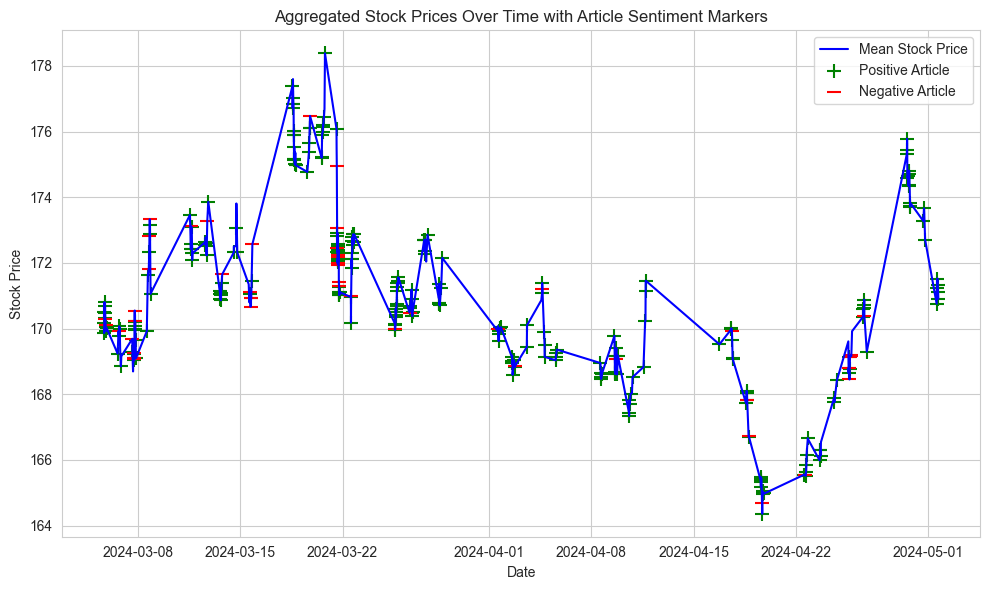

In [12]:
plot_aggregated_stock_prices_with_sentiment_markers(df)

# <font color='pink'>After 30 mins</font>

In [13]:
after_30=pd.read_csv(r'..\data\stockPrices\stock_prices_after_30_mins.csv')
after_30.head(1)

,Date,article_title,article,source_name,source_link,ticker_symbol,Positive,Negative,Neutral,Compound,Sentiment,stock_price,stock_price_after_30_mins,change_percentage,label
0,2024-05-01 17:51:00,"After Nvidia and Apple, Alibaba Chases Vietnam...",Alibaba Group Holding Limited (NYSE:BABA) plan...,Yahoo Finance,https://finance.yahoo.com/news/nvidia-apple-al...,AAPL,0.107,0.038,0.855,0.9772,Positive,170.908401,170.889999,-0.010767,0


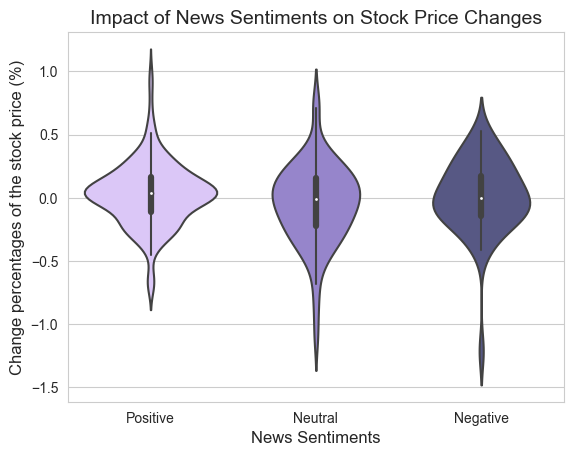

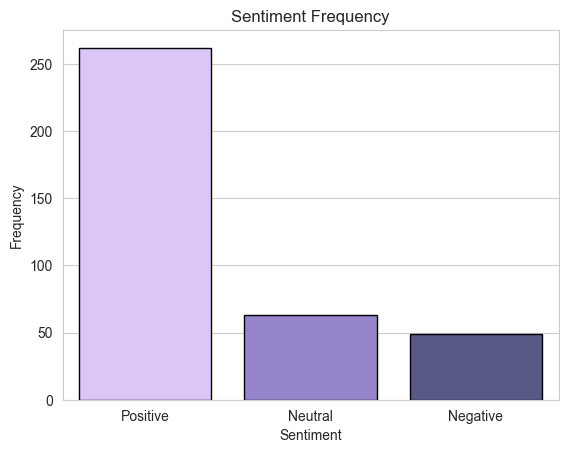

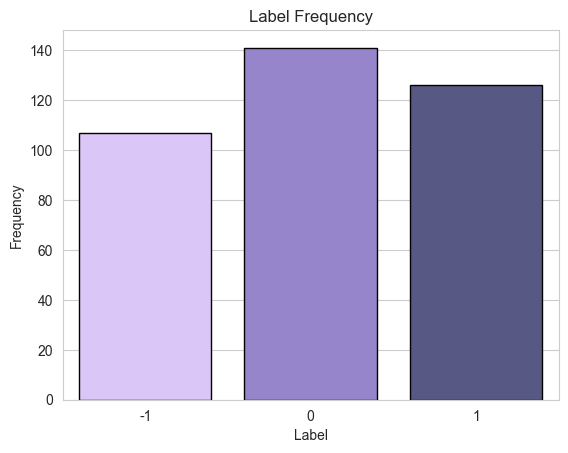

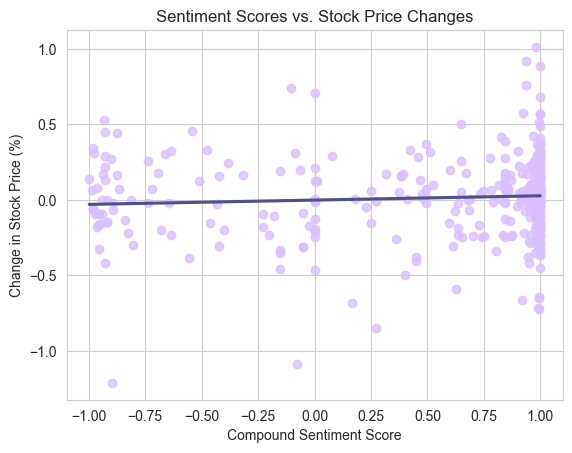

In [14]:
violinPlot('Sentiment','change_percentage',after_30)
frequencySentiments('Sentiment',after_30)
frequencyLabels('label',after_30)
scatterPlot('Compound','change_percentage',after_30)

In [15]:
compound_scores = after_30['Compound']
change_percentage = after_30['change_percentage']


spearman_corr, spearman_p_value = spearman_test(after_30, 'Compound', 'change_percentage')
shapiro_stat_compound, shapiro_p_value_compound = shapiro_test(compound_scores)
shapiro_stat_change, shapiro_p_value_change = shapiro_test(change_percentage)
pearson_corr, pearson_p_value = pearson_test(after_30, 'Compound', 'change_percentage')


print("Spearman correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)
print("Shapiro-Wilk test statistic for Compound scores:", shapiro_stat_compound)
print("p-value for Compound scores:", shapiro_p_value_compound)
print("Shapiro-Wilk test statistic for Change percentage:", shapiro_stat_change)
print("p-value for Change percentage:", shapiro_p_value_change)
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

Spearman correlation coefficient: 0.09275699054466124
p-value: 0.07318190031820086
Shapiro-Wilk test statistic for Compound scores: 0.6983599662780762
p-value for Compound scores: 2.3185502077392924e-25
Shapiro-Wilk test statistic for Change percentage: 0.9649743437767029
p-value for Change percentage: 8.346344770870928e-08
Pearson correlation coefficient: 0.0691942971009502
p-value: 0.18178617571572742


# <font color='pink'>After 6 hours</font>

In [16]:
after_6_hours=pd.read_csv('..\data\stockPrices\stock_prices_after_6_hours.csv')

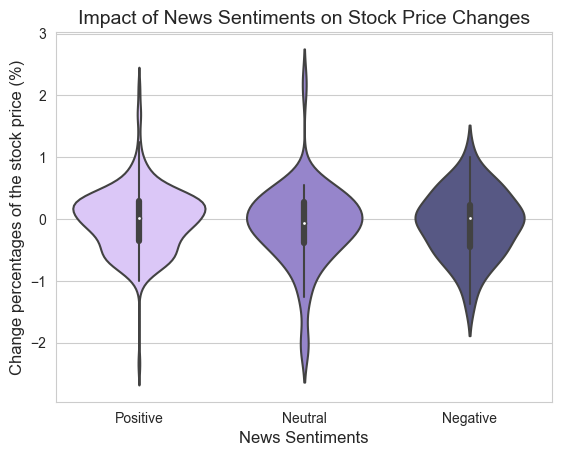

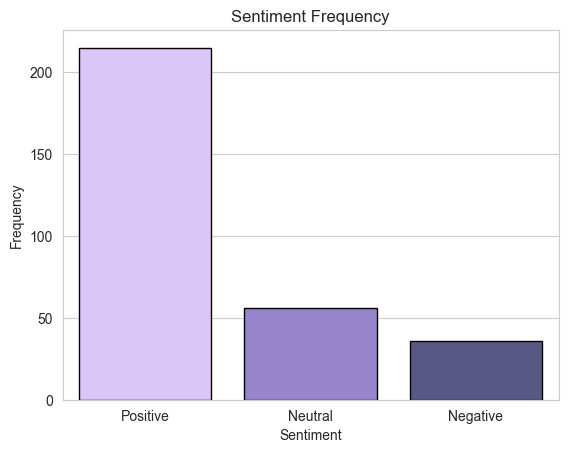

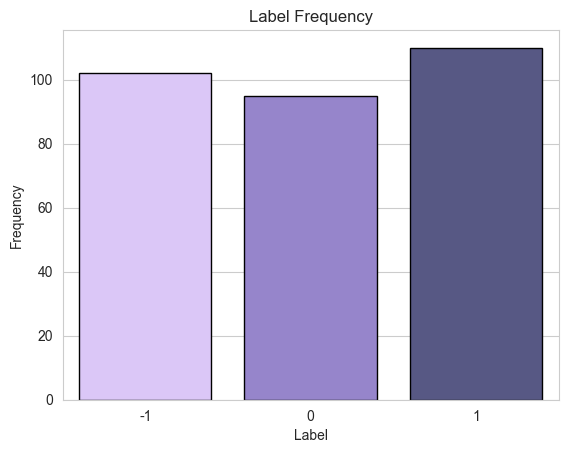

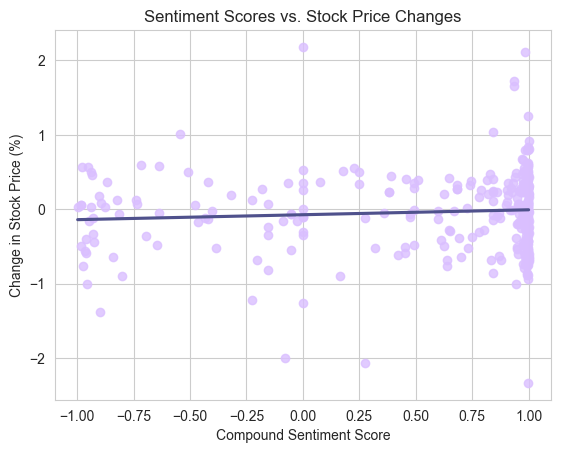

In [17]:
violinPlot('Sentiment','change_percentage',after_6_hours)
frequencySentiments('Sentiment',after_6_hours)
frequencyLabels('label',after_6_hours)
scatterPlot('Compound','change_percentage',after_6_hours)

In [18]:
compound_scores = after_6_hours['Compound']
change_percentage = after_6_hours['change_percentage']


spearman_corr, spearman_p_value = spearman_test(after_6_hours, 'Compound', 'change_percentage')
shapiro_stat_compound, shapiro_p_value_compound = shapiro_test(compound_scores)
shapiro_stat_change, shapiro_p_value_change = shapiro_test(change_percentage)
pearson_corr, pearson_p_value = pearson_test(after_6_hours, 'Compound', 'change_percentage')


print("Spearman correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)
print("Shapiro-Wilk test statistic for Compound scores:", shapiro_stat_compound)
print("p-value for Compound scores:", shapiro_p_value_compound)
print("Shapiro-Wilk test statistic for Change percentage:", shapiro_stat_change)
print("p-value for Change percentage:", shapiro_p_value_change)
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

Spearman correlation coefficient: 0.05055313165228412
p-value: 0.37739099651480457
Shapiro-Wilk test statistic for Compound scores: 0.7048639059066772
p-value for Compound scores: 6.883726476703384e-23
Shapiro-Wilk test statistic for Change percentage: 0.9520677924156189
p-value for Change percentage: 1.8117512823323523e-08
Pearson correlation coefficient: 0.07881636258808829
p-value: 0.1683624964174344


# <font color ='pink'> After a Day</font>

In [19]:
after_1_day=pd.read_csv('..\data\stockPrices\stock_prices_after_1_day.csv')

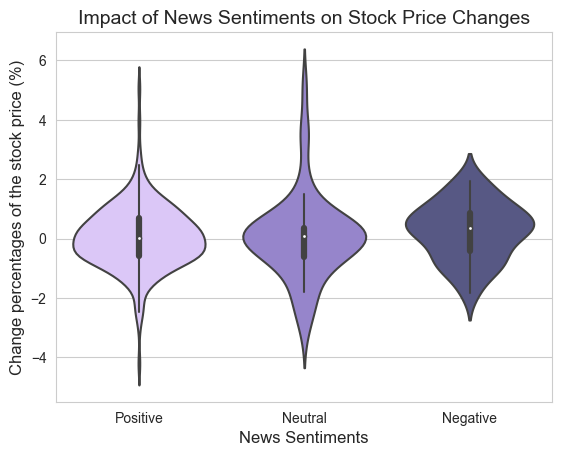

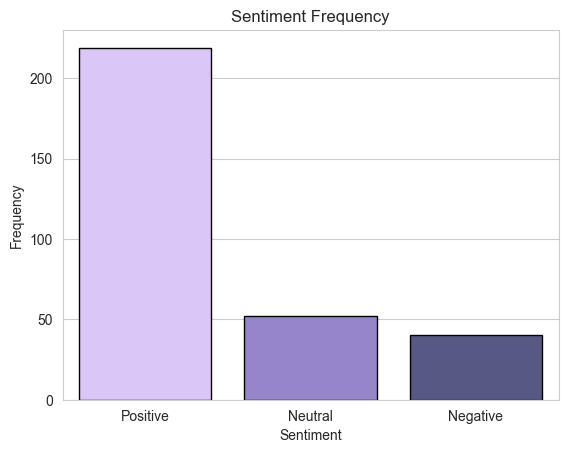

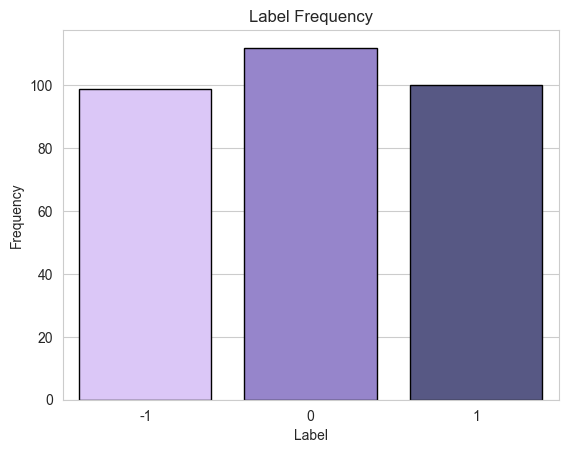

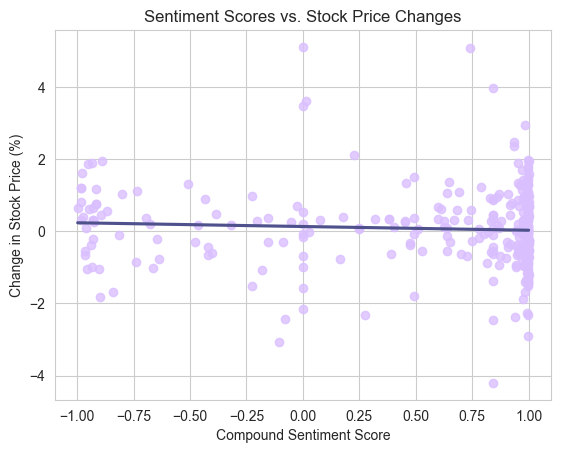

In [20]:
violinPlot('Sentiment','change_percentage',after_1_day)
frequencySentiments('Sentiment',after_1_day)
frequencyLabels('label',after_1_day)
scatterPlot('Compound','change_percentage',after_1_day)

In [21]:
compound_scores = after_1_day['Compound']
change_percentage = after_1_day['change_percentage']


spearman_corr, spearman_p_value = spearman_test(after_1_day, 'Compound', 'change_percentage')
shapiro_stat_compound, shapiro_p_value_compound = shapiro_test(compound_scores)
shapiro_stat_change, shapiro_p_value_change = shapiro_test(change_percentage)
pearson_corr, pearson_p_value = pearson_test(after_1_day, 'Compound', 'change_percentage')


print("Spearman correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)
print("Shapiro-Wilk test statistic for Compound scores:", shapiro_stat_compound)
print("p-value for Compound scores:", shapiro_p_value_compound)
print("Shapiro-Wilk test statistic for Change percentage:", shapiro_stat_change)
print("p-value for Change percentage:", shapiro_p_value_change)
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

Spearman correlation coefficient: -0.08438251869741366
p-value: 0.13760768641866755
Shapiro-Wilk test statistic for Compound scores: 0.6994842290878296
p-value for Compound scores: 3.25383003743885e-23
Shapiro-Wilk test statistic for Change percentage: 0.9549661874771118
p-value for Change percentage: 3.4829692907578647e-08
Pearson correlation coefficient: -0.0608586915616449
p-value: 0.28465305955619363
